<h3> Assignment

In this assignment students have to make ARIMA model over shampoo sales data and
check the MSE between predicted and actual value.

Student can download data in .csv format from the following link:
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

<b> Since data on above link is not working so I am using stock of 5 years data for REC Ltd

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [16]:
dfStock = pd.read_csv('RECLTD.NS.csv')

In [17]:
dfStock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-12,125.550003,128.699997,125.000000,126.824997,77.992607,4746436.0
1,2014-05-13,129.350006,130.475006,124.000000,128.100006,78.776688,3891000.0
2,2014-05-14,128.024994,135.975006,125.925003,134.375000,82.635567,4714164.0
3,2014-05-15,136.000000,137.949997,134.050003,136.149994,83.727119,6270428.0
4,2014-05-16,140.000000,176.975006,139.350006,145.100006,89.231041,14451382.0


In [18]:
dfStock2 = dfStock[['Date', 'Close']]

In [19]:
dfStock2.set_index('Date', inplace=True)

In [20]:
dfStock2.Close = np.round(dfStock2.Close, 0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [21]:
dfStock2.head()

,Close
Date,
2014-05-12,127.0
2014-05-13,128.0
2014-05-14,134.0
2014-05-15,136.0
2014-05-16,145.0


In [157]:
from pandas.tools.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(24,8)})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


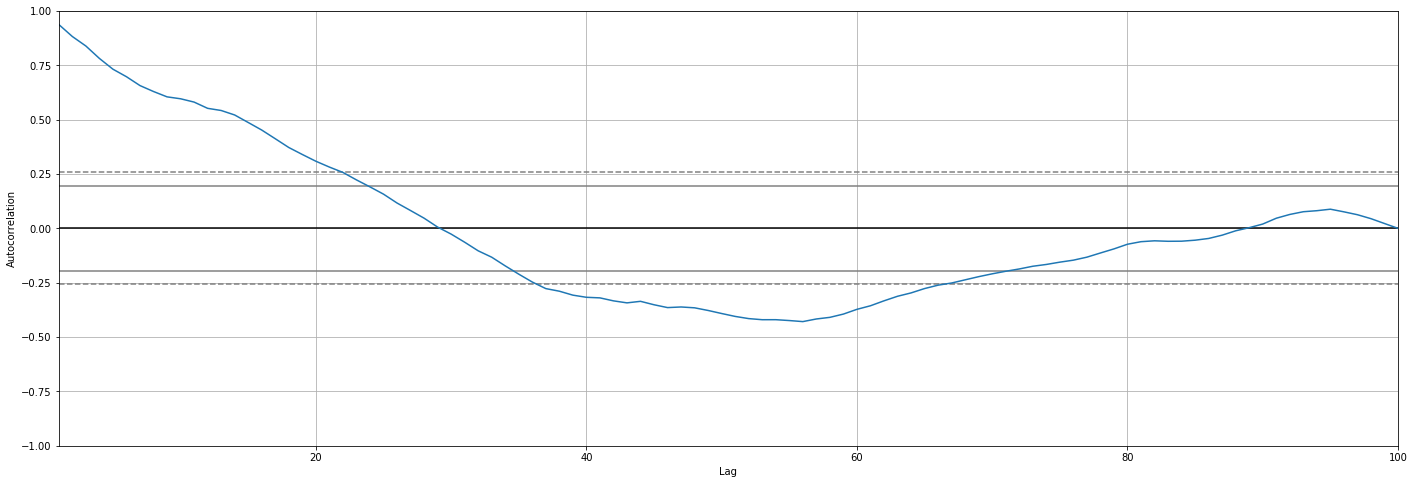

In [160]:
autocorrelation_plot(dfStock2.iloc[0:100])

Above plot only for 100 first values shows that data is a non stationary, lets validate same by using statistical technique as well

In [162]:
adfuller(dfStock2.Close.iloc[:100])

(-0.8225941701486161,
 0.8123949471373949,
 4,
 95,
 {'1%': -3.5011373281819504,
  '5%': -2.8924800524857854,
  '10%': -2.5832749307479226},
 524.9651545140547)

High p value confirms that it is a non stationary data

<b> 1. Before forecasting for the stock price, lets figure out what would be ideal values of p & q i.e. order of Auto Regression and Moving Average

In [166]:
#First Order differencing
temp = dfStock2 - dfStock2.shift(1)
temp.dropna(inplace=True)

In [154]:
adfuller(temp.Close.iloc[:300])

(-9.434730621215538,
 5.07830000859532e-16,
 3,
 296,
 {'1%': -3.452636878592149,
  '5%': -2.8713543954331433,
  '10%': -2.5719993576515705},
 1588.4692566070366)

This confirms that p can be 1, statistically even with p as 1 data became stationary.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


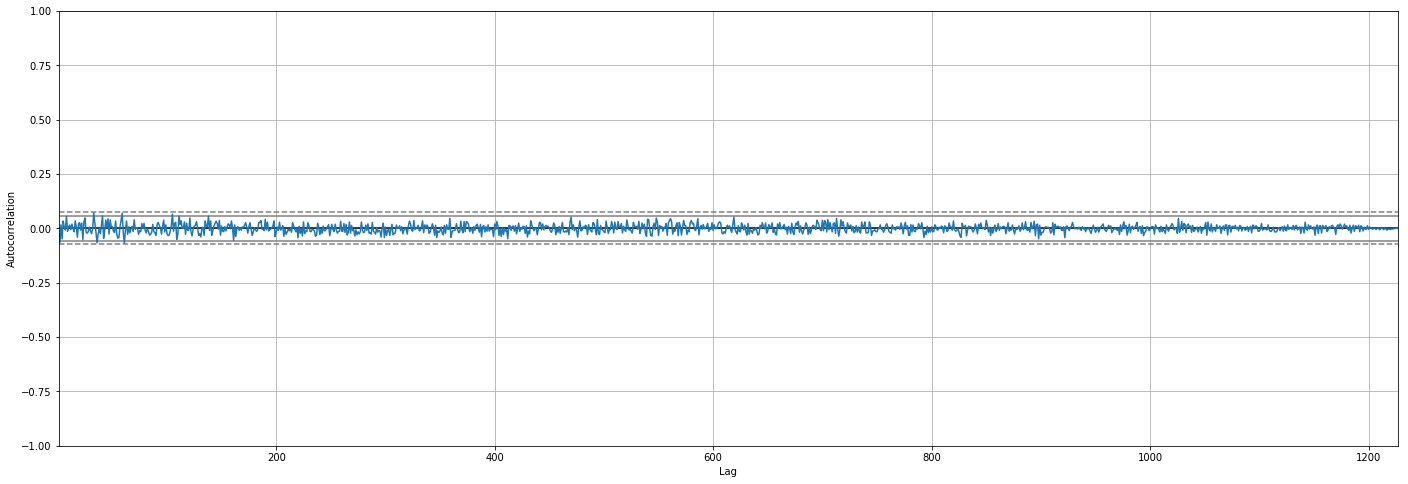

In [167]:
# Correlogram for first order data
autocorrelation_plot(temp)

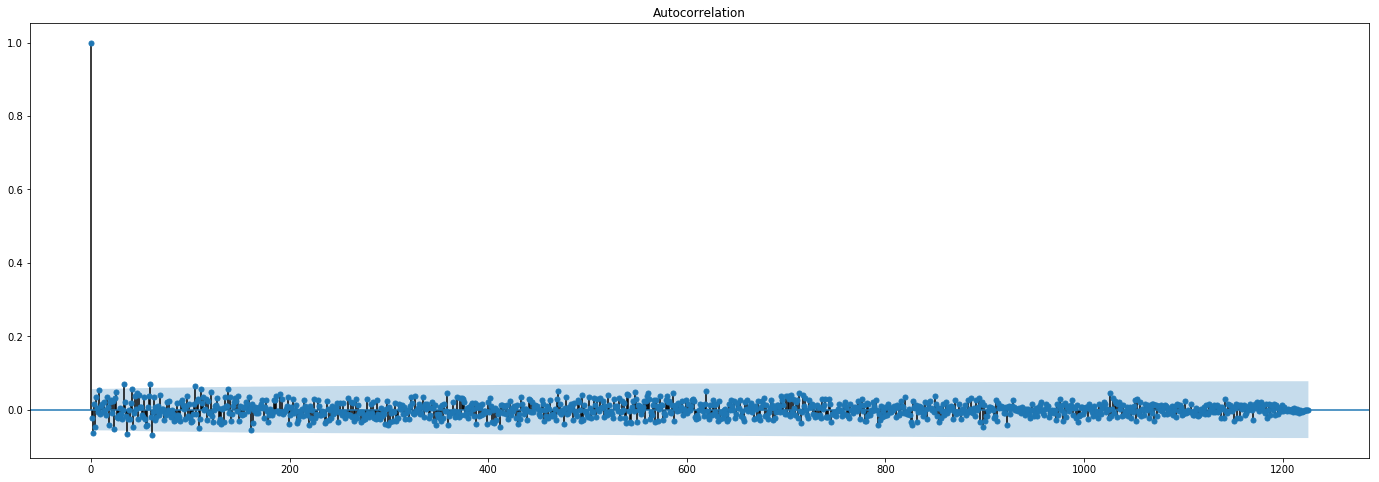

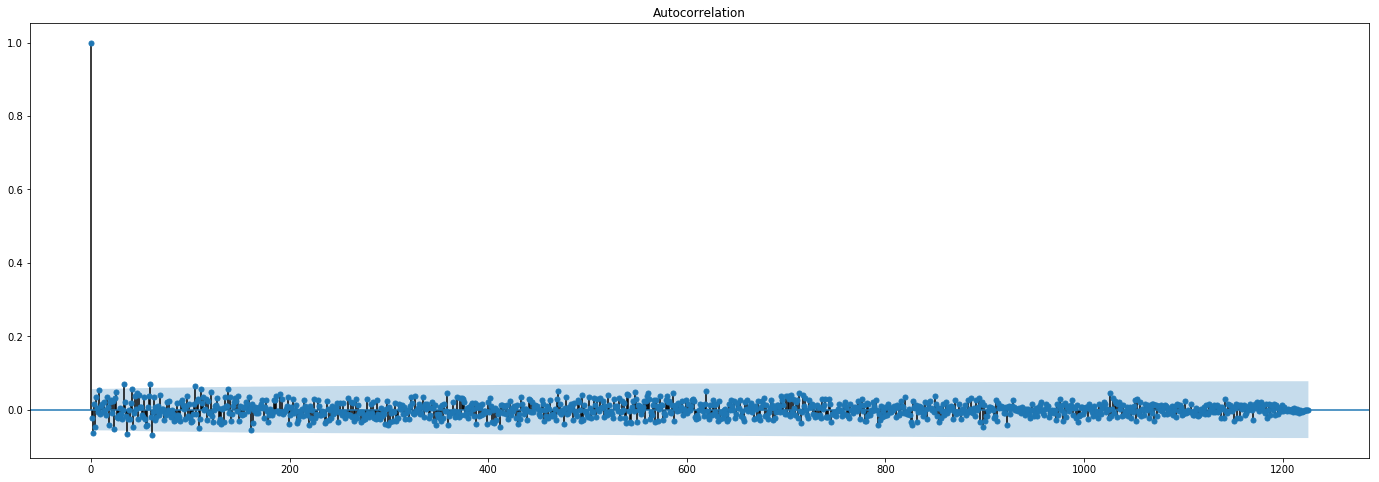

In [155]:
plot_acf(temp)

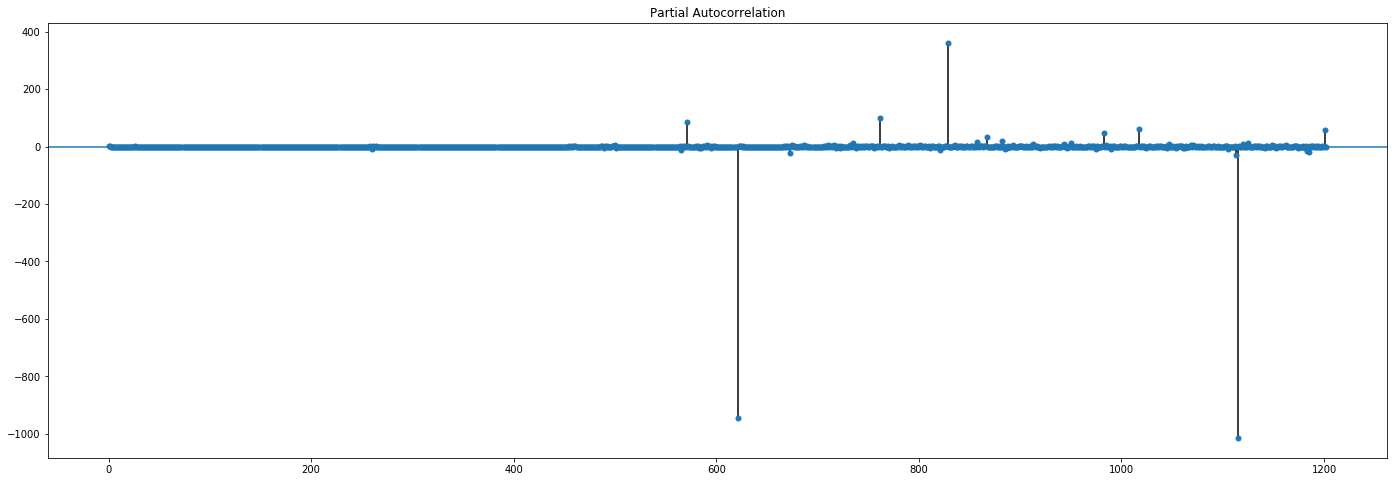

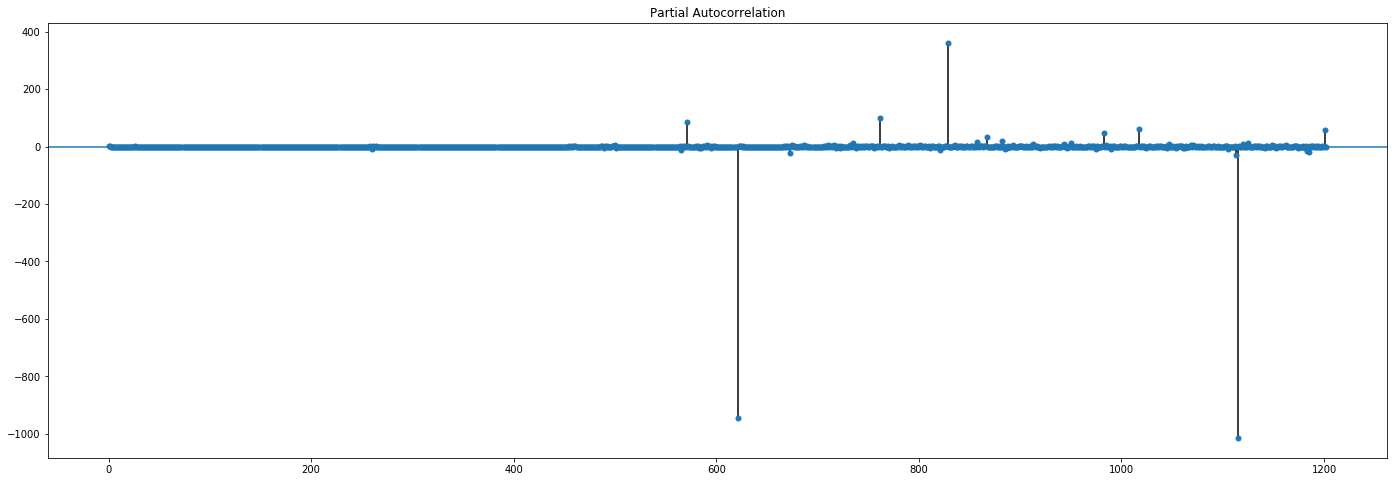

In [141]:
temp = dfStock2 - dfStock2.shift(25)
temp.dropna(inplace=True)
plot_pacf(temp)

<b> Auto correlation graph shows that differencing of 1 has made data stationary but partial auto correlation shows that data is not stationary with 1 as MA order

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 432x288 with 0 Axes>

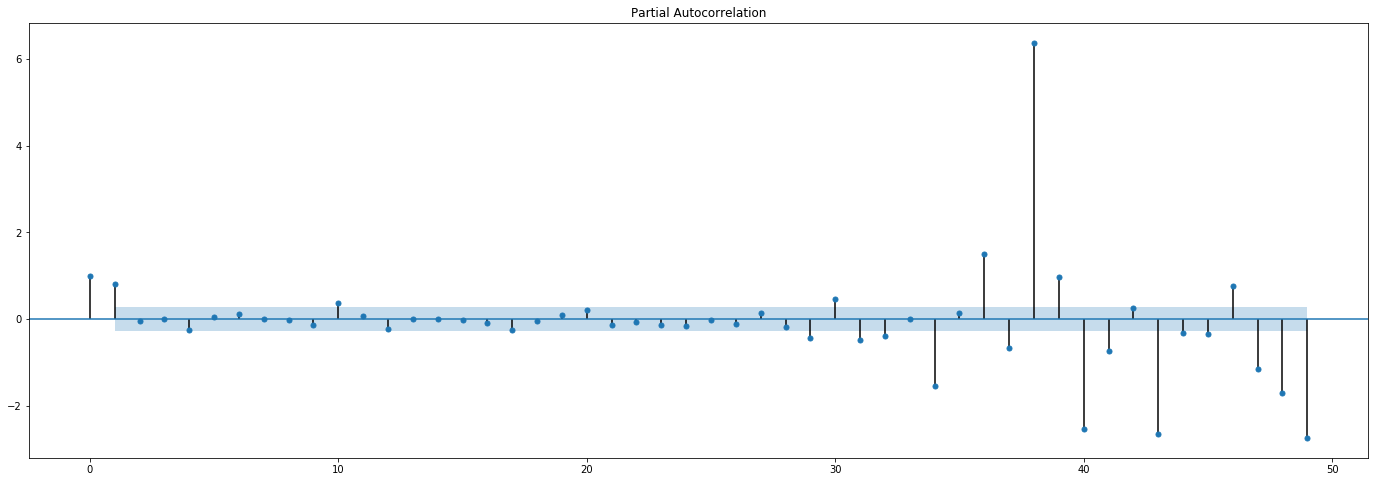

In [70]:
# Value of p for AR
fig = plt.figure()
fig = plot_pacf(dfStock2.iloc[:50])
fig.set_size_inches(24,8)

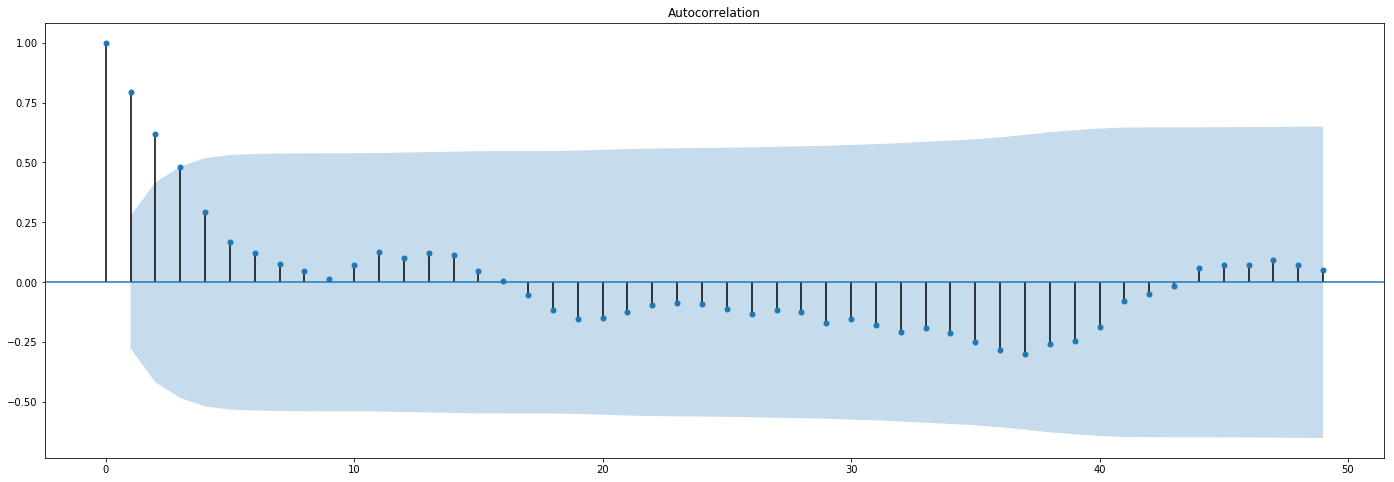

In [84]:
# Value of q for MA
fig = plot_acf(dfStock2.iloc[:50])
fig.set_size_inches(24,8)

<b> From above graphs, values are inverting at p = 1 and q = 16

In [35]:
dfStock2.shape

(1230, 1)

In [36]:
dfStock2.dropna().shape

(1229, 1)

<b> 2. Lets validate stationary check using seasonal decomposition

In [168]:
?seasonal_decompose

Signature:
seasonal_decompose(
    ['x', "model='additive'", 'filt=None', 'freq=None', 'two_sided=True', 'extrapolate_trend=0'],
)
Docstring:
Seasonal decomposition using moving averages

Parameters
----------
x : array-like
    Time series. If 2d, individual series are in columns.
model : str {"additive", "multiplicative"}
    Type of seasonal component. Abbreviations are accepted.
filt : array-like
    The filter coefficients for filtering out the seasonal component.
    The concrete moving average method used in filtering is determined by two_sided.
freq : int, optional
    Frequency of the series. Must be used if x is not a pandas object.
    Overrides default periodicity of x if x is a pandas
    object with a timeseries index.
two_sided : bool
    The moving average method used in filtering.
    If True (default), a centered moving average is computed using the filt.
    If False, the filter coefficients are for past values only.
extrapolate_trend : int or 'freq', optional
    If

<Figure size 1728x576 with 0 Axes>

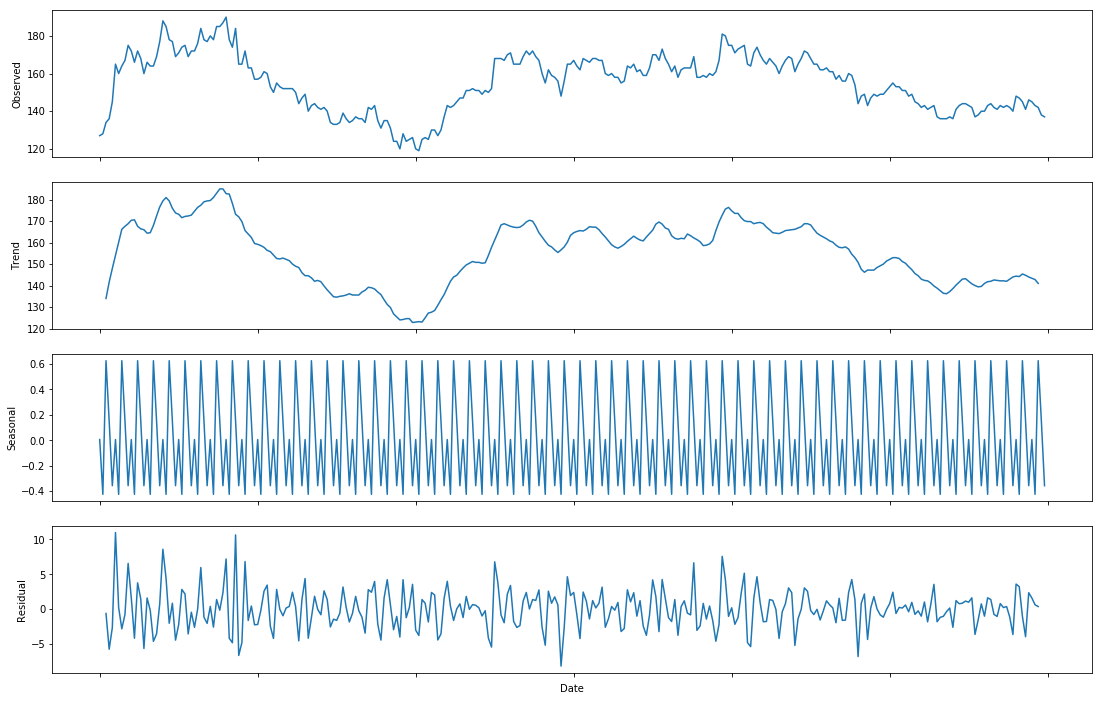

In [177]:
fig = plt.figure()
decompose = seasonal_decompose(dfStock2.dropna().iloc[0:300], model='additive', freq=5)
fig = decompose.plot()
fig.set_size_inches(15, 10)

 From above it looks like there no seasonality and no particular trend but over a short period, there is a trend either uptrend or downtrend

Statistical test to check if stationary or not

In [102]:
adfuller(dfStock2['Close'].dropna())

(-1.8169328123156858,
 0.37208801583236434,
 4,
 1224,
 {'1%': -3.4357038129673962,
  '5%': -2.8639042041471887,
  '10%': -2.5680287376916997},
 6383.89707503809)

<b> Since p-value is greater than 0.05 cut off value so we reject null hypothesis and data is not stationary. Because there was continuous trend i.e. some time its uptrend and sometimes downtrend

<b> 3. Fit the model and predict

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [193]:
splitRatio = int(dfStock2.dropna().shape[0] * 0.5)
#splitRatio = 100
train, test = dfStock2.dropna()[0:splitRatio], dfStock2.dropna()[splitRatio:1200]
history = list(train.Close)
predictedValues = list()

In [194]:
#for i in range(test.shape[0]):
for i in range(20):
    if i==0 or i // 10 == 0:
        model = ARIMA(history[i:100+i], order=(2, 0, 15))
        model_fit = model.fit(disp=0)
    temp = int(model_fit.forecast()[0][0])
    predictedValues.append(temp)
    history.append(temp)

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [190]:
print(len(history))
print(train.shape[0])

618
614


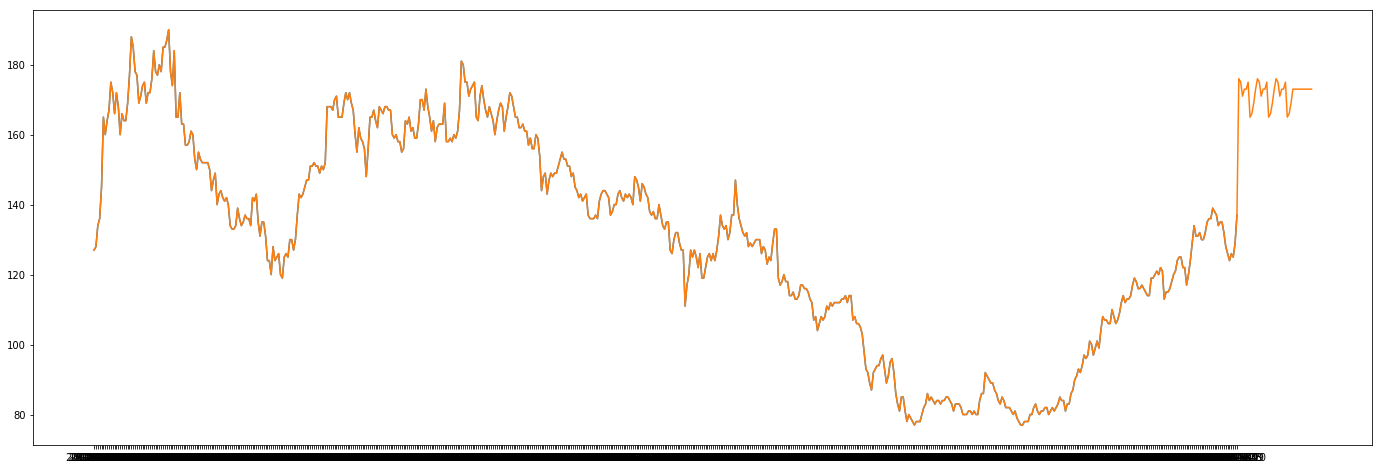

In [185]:
plt.plot(train)
plt.plot(history)
plt.show()

In [37]:
model_fit.forecast()[0][0]

162.30750236627998

In [25]:
?model.fit

Signature:
model.fit(
    ['start_params=None', "trend='c'", "method='css-mle'", 'transparams=True', "solver='lbfgs'", 'maxiter=500', 'full_output=1', 'disp=5', 'callback=None', 'start_ar_lags=None', '**kwargs'],
)
Docstring:
Fits ARIMA(p,d,q) model by exact maximum likelihood via Kalman filter.

Parameters
----------
start_params : array-like, optional
    Starting parameters for ARMA(p,q).  If None, the default is given
    by ARMA._fit_start_params.  See there for more information.
transparams : bool, optional
    Whehter or not to transform the parameters to ensure stationarity.
    Uses the transformation suggested in Jones (1980).  If False,
    no checking for stationarity or invertibility is done.
method : str {'css-mle','mle','css'}
    This is the loglikelihood to maximize.  If "css-mle", the
    conditional sum of squares likelihood is maximized and its values
    are used as starting values for the computation of the exact
    likelihood via the Kalman filter.  If "mle", th

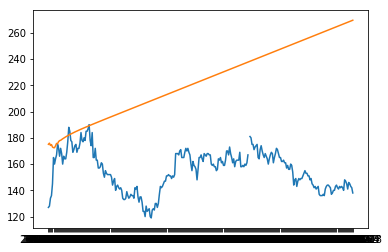

In [130]:
plt.plot(dfStock2[0:300])
plt.plot(predictedValues)